<a href="https://colab.research.google.com/github/hypervisorserver/DAP_2022/blob/main/Lecture10_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions.

The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted.

Clustering works by separating the training cases based on similarities that can be determined from their feature values.

## Seed dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml).

In [1]:
import pandas as pd
#밀(seed)의 정보값을 통해 species를 분류해주는 군집화(종의 추정)
# load the training dataset
data = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/ml-basics/master/data/seeds.csv')

data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


## Visualization - Scatter Plot

As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot. We should take advantage of a dimensionality reduction technique, however we did not cover yet.

Alternatively, we just chose choose two variable (`area`, `groove_length`) visualize the data.

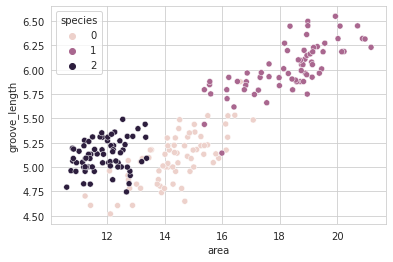

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.scatterplot(x='area', y='groove_length', data=data, hue='species')
plt.show()

## Set up DataFrame
Drop `species` values from DataFrame

In [3]:
X = data.drop(columns='species')
X.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


## How many clusters?

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the `within cluster sum of squares` (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

$WCSS = \sum_{j=1}^k\sum_{i}^n\mathrm{dist}(x_i, C_j)^2$

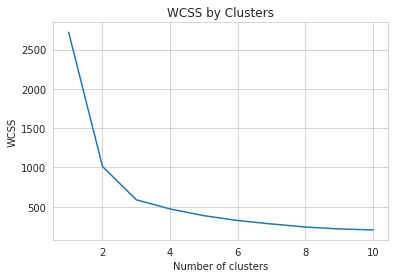

In [4]:
#k를 몇으로 지정하는지가 궁금함
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
#k=1~10까지 측정해서 성능체크
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    #거리들을 계산해서 어느k로 선정해야 좋은지
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#k=3일때 가장 최적화(중간에 엄청꺽이지 않을 때)

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## K-Means Clustering

The algorithm we used to create our test clusters is *K-Means*. This is a commonly used clustering algorithm that separates a dataset into *K* clusters of equal variance. The number of clusters, *K*, is user defined. The basic algorithm has the following steps:

**[TODO]** Let's try using K-Means on our seeds data with a `K` value of 3 with `random_state=0`.

In [5]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
#k=3으로 지정 + 중심점을 랜덤으로 정하는것을 방지함
model = KMeans(n_clusters=3, random_state= 0)

# Fit to the data and predict the cluster assignments for each data point
#unlabeld 이므로 정답값이 없으므로 train_test_split은 수행안함
#모든 데이터를 이용해서 군집화
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = X.copy()
X_withCluster['km_clusters'] = km_clusters

## Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

### Agglomerative Nesting (AGNES) Clustering 
**[TODO]** Let's try using AGNES on our seeds data with a `average` linkage.


In [6]:
from sklearn.cluster import AgglomerativeClustering

#average가 정확도는 높으나 계산량이 많아서 좋은것만은 아님
agg_model = AgglomerativeClustering(n_clusters=3 , linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters
X_withCluster

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,km_clusters,agg_clusters
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,0


## Visulize the Clustering Results

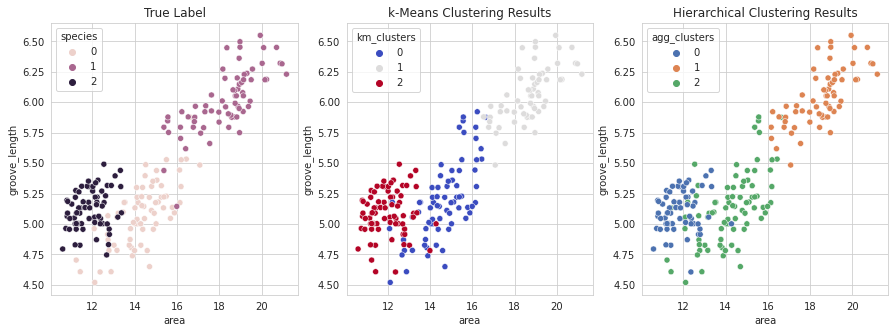

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x='area', y='groove_length', data=data, hue='species',
           ax=ax[0])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='km_clusters',
           palette='coolwarm', ax=ax[1])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='agg_clusters',
           palette='deep', ax=ax[2])
ax[0].set(title='True Label')
ax[1].set(title='k-Means Clustering Results')
ax[2].set(title='Hierarchical Clustering Results')

plt.show()
#0,1,2의 순서가 다르니까
#임의로 0,1,2를 바꾸다보니까 주의해야함!!

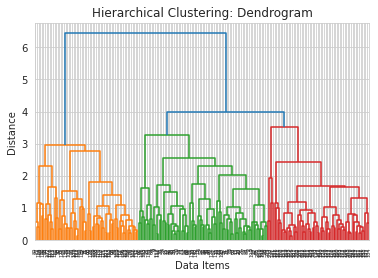

In [8]:
# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create dendrogram using ward linkage
#거리=4를 기준으로 잘라서 color를 구분함
dendrogram(linkage(X.values, method='average'), color_threshold=4)

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data Items')
plt.ylabel('Distance')
plt.show()

# Evaluation

**[TODO]** Internal Evaluation with `Silhouette Score`

In [9]:
from sklearn.metrics import silhouette_score

#X.value를 가지고 군집화한 것과 - km_clutsers의 군집의 성능을 비교함
#왜 x.value랑 비교하지??
print('silhouette of kMeans: %f'%silhouette_score(X.values, km_clusters))
print('silhouette of Hierarchical Clustering: %f'%silhouette_score(X.values, agg_clusters))

silhouette of kMeans: 0.471934
silhouette of Hierarchical Clustering: 0.458112


**[TODO]** External Evaluation with `F1 Score`

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

target = data.species
print('kMeans')
print(classification_report(target, km_clusters))

_agg_clusters = agg_clusters.copy()
#0,1,2의 순서가 다르니까
#임의로 0,1,2를 바꾸다보니까 주의해야함!!
#정답, kmeans는 2-0-1로 되있음
#hear은 0-2-1로 되있음
_agg_clusters[agg_clusters==0]=2
_agg_clusters[agg_clusters==2]=0

print('Hierarchical Clustering')
print(classification_report(target, _agg_clusters))


kMeans
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        70
           1       0.98      0.86      0.92        70
           2       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

Hierarchical Clustering
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        70
           1       0.98      0.91      0.95        70
           2       0.95      0.87      0.91        70

    accuracy                           0.91       210
   macro avg       0.92      0.91      0.91       210
weighted avg       0.92      0.91      0.91       210



# [TODO]

## 이번 과제는 라이브 셀링에 관한 데이터입니다!

라이브 셀러(책, '라이브 커머스, 셀링의 기술' 참조)란?

[우리는 알게 모르게 이미 물건을 팔고 있다. 내가 산 전자제품이 마음에 들면 블로그에 자발적 후기를 올리고, 배달 음식을 시켜 먹어도 사진을 찍고 전문가 수준으로 맛을 표현해가며 앱에 평가를 적는다. 책을 읽고 리뷰를 써서 SNS에 공유하고, 캠핑을 다녀와서 그곳이 얼마나 아름다웠는지 사진으로 열변을 토한다. 내 리뷰를 보고 누군가 그 음식을 시켜먹었다면, 내가 찍은 사진을 보고 그 캠핑장을 방문했다면 여러분은 이미 셀러로서의 능력을 충분히 갖춘 셈이다. 

사람들은 이제 광고에 쉽게 넘어가지 않는다. 지인들의 평가, 직접 찍은 사진과 함께 공들여 쓴 자세한 리뷰, 평소에 팔로우하던 인플루언서의 소개를 보고 물건을 구매한 지 오래다.]

이 데이터에 속성들은 share를 얼마나했는지 comment를 얼마나 달았는지, link나 video, photo등에 대해서 어떤 감정표현을 남겼는지 나타내준다.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 데이터 전처리
- Clustering은 Unsupervise Learning으로 정답값이 없이 결과를 도출해 내야 합니다!
- mapping을 통한 라벨링이나 drop등을 이용하여 자유롭게 전처리 해주세요!


In [12]:
#의미없는 속성들은 전처리(Nan값, 날자, id)
X = df.dropna(axis=1).drop(columns=['status_id','status_published'])

#카테고리 데이터는 원핫인코딩 적용함
X= pd.get_dummies(X)
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


Text(0.5, 0, 'num_likes')

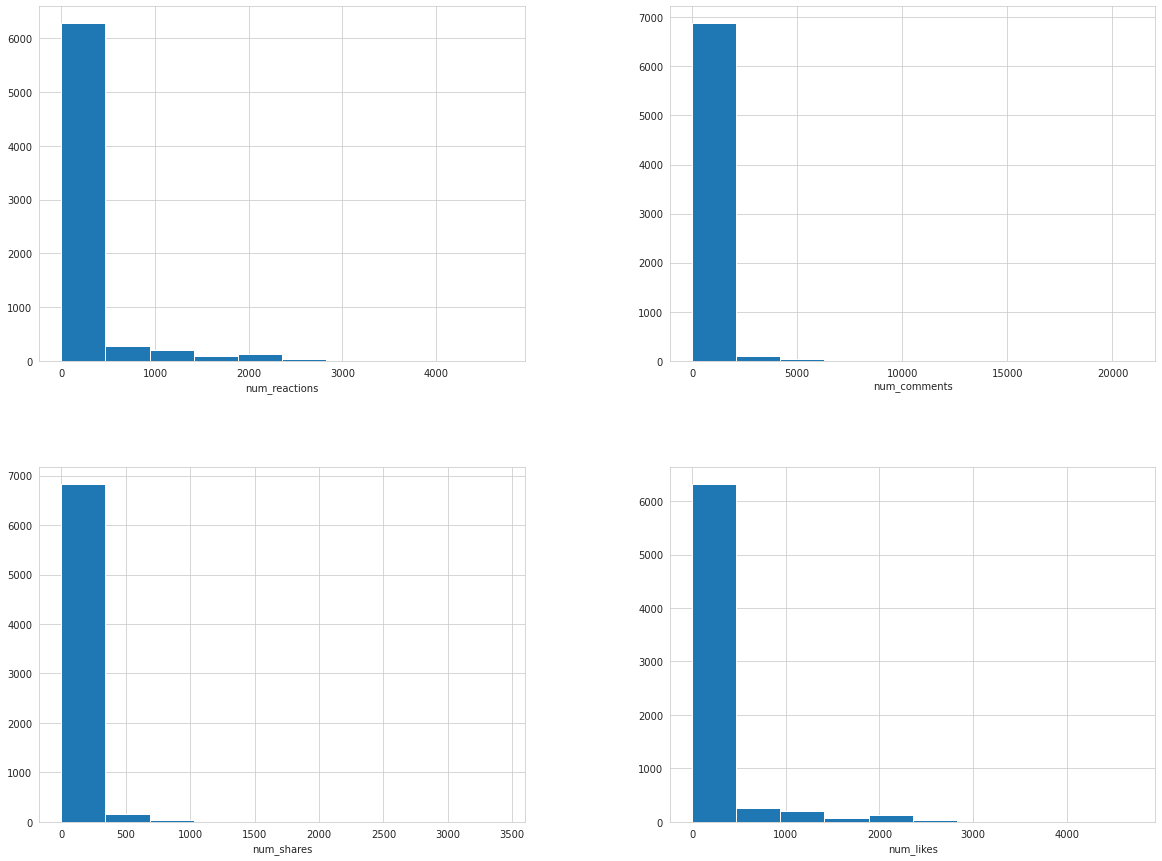

In [13]:
#데이터의 속성범위가 너무 다양하다.
#scal작업을 수행하면 오히려 실루엣계수가 더 낮게 나오는 현상도 발생함(데이터의 속성 특징때문에)
#스케일작업 보류
f, axes = plt.subplots(2, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

#
axes[0, 0].hist(x='num_reactions', data=X)
axes[0,0].set_xlabel('num_reactions')

axes[0, 1].hist(x='num_comments', data=X)
axes[0,1].set_xlabel('num_comments')

axes[1, 0].hist(x='num_shares', data=X)
axes[1,0].set_xlabel('num_shares')

axes[1, 1].hist(x='num_likes', data=X)
axes[1,1].set_xlabel('num_likes')

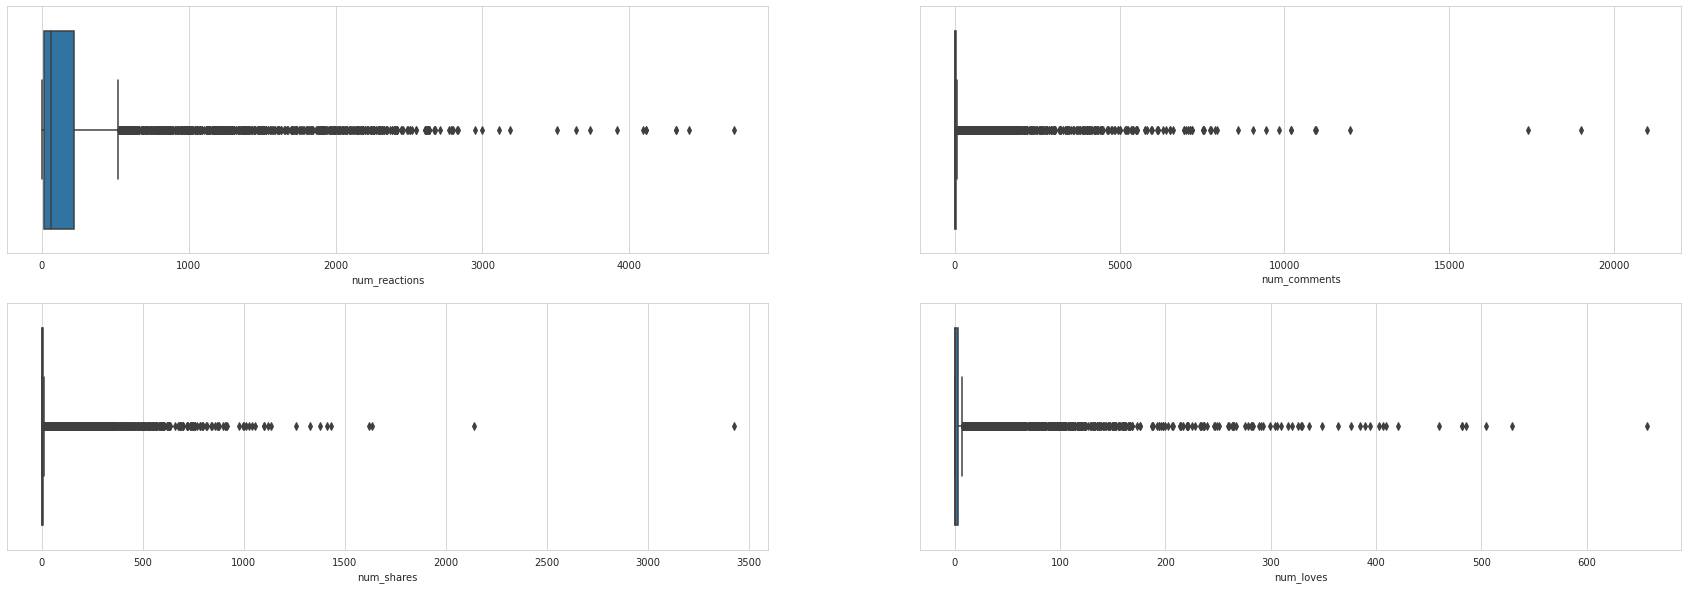

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(30,10))

#그렇다고 속성의 이상치를 제거하는것도 
#데이터의 boxplot을 보면 알수있듯이 쉽지 않음(실제로 이상치 제거가 쉽지 않음)

sns.boxplot(x='num_reactions', data=X, ax=ax[0][0])
sns.boxplot(x='num_comments', data=X, ax=ax[0][1])
sns.boxplot(x='num_shares', data=X, ax=ax[1][0])
sns.boxplot(x='num_loves', data=X, ax=ax[1][1])

In [15]:
#일단은 scaling작업 + 이상치제거는 수행없이 진행된다

#다중공선성을 고려하면
#num_reactions - num_likes
#num_shares - num_loves
#status_type_photo - status_type_video
#간의 상관관계가 높은 것을 파악할 수 있다
X.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.028743,-0.131515,0.105402,0.081046
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,-0.023340,-0.291846,-0.049413,0.330662
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.025708,-0.354780,-0.066524,0.404473
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.032658,-0.100537,0.114631,0.043784
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.029523,-0.351741,-0.065283,0.401499
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.011968,-0.086409,-0.003129,0.093498
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.015951,-0.159237,-0.034656,0.184682
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,-0.014489,-0.078953,0.020866,0.074971
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.014789,-0.115695,-0.028465,0.136370
status_type_link,0.028743,-0.023340,-0.025708,0.032658,-0.029523,-0.011968,-0.015951,-0.014489,-0.014789,1.000000,-0.118315,-0.022188,-0.066802


In [16]:
#다중공선선을 고려해서 
#'num_likes','num_loves','status_type_video' 3개의 컬럼은 삭제한다

X = X.drop(columns=['num_likes','num_loves','status_type_video'])
X

,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status
0,529,512,262,3,1,1,0,0,0,0
1,150,0,0,0,0,0,0,0,1,0
2,227,236,57,1,1,0,0,0,0,0
3,111,0,0,0,0,0,0,0,1,0
4,213,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,0,0,0,0,0,1,0
7046,16,0,0,0,1,0,0,0,1,0
7047,2,0,0,0,0,0,0,0,1,0
7048,351,12,22,0,0,0,0,0,1,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
import numpy as np

#MinMaxScaler작업 + PCA를 수행하니 거의 완벽하게 성능이 나와버림...
scal = MinMaxScaler()
pca = PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(scal.fit_transform(X)), columns = ['component1','component2'])
X

,component1,component2
0,0.595128,-0.147120
1,-0.395829,0.011301
2,0.591240,-0.146555
3,-0.396063,0.011017
4,-0.395450,0.011761
...,...,...
7045,-0.396195,0.010856
7046,-0.396584,0.010248
7047,-0.396719,0.010221
7048,-0.394433,0.012507


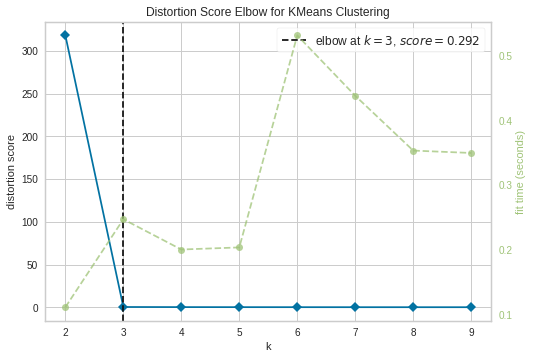

In [18]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# KElbowVisualizer작업한 결과 최적의 k=3을 찾을 수 있음
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        
visualizer.show()  

n_clusters =  2  Silhouette Coefficient: 0.9192605971089606


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


n_clusters =  3  Silhouette Coefficient: 0.9953208466757365


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


n_clusters =  4  Silhouette Coefficient: 0.934805618938823


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


n_clusters =  5  Silhouette Coefficient: 0.8807208379292345


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


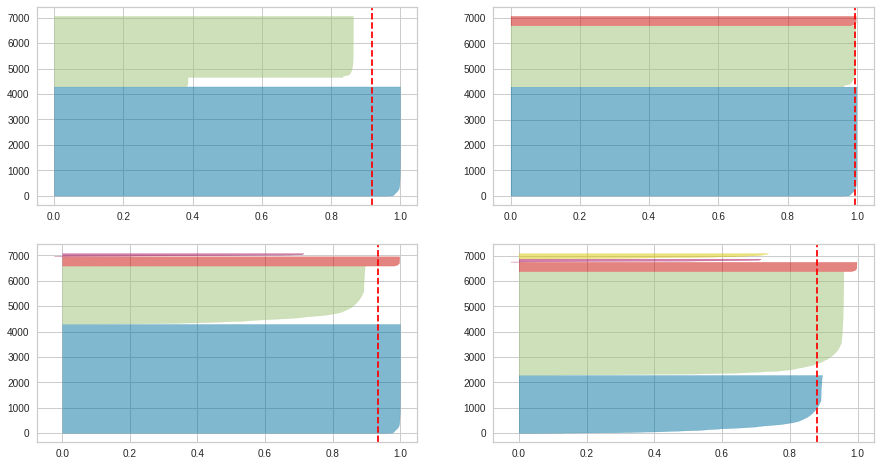

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

# SilhouetteVisualizer 작업한 결과 최적의 k=3을 찾을 수 있음
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, random_state=0)
    q, mod = divmod(i, 2)
    
    print("n_clusters = ", i, " Silhouette Coefficient:", silhouette_score(X, km.fit_predict(X)))
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 


## Elbow analysis with K-MEANS

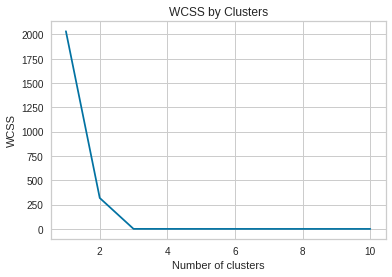

In [20]:
#importing the libraries
#WCSS가 확꺽이는 지점은 k=2 or 3일때인것을 파악할 수 있으므로
#n_clusters = 3으로로 잡을 예정임
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K-means or Any other Clustering Methods

In [21]:
#K-means를 활용한 군집화 수행
num_clusters= 3

km = KMeans(n_clusters = num_clusters, random_state=0)

#형식에는 쓰라고 했으나 딱히 필요없음
#km.fit(X)

pred = km.fit_predict(X)
X_withCluster = X.copy()
X_withCluster['km_clusters'] = pred
X_withCluster.head()

,component1,component2,km_clusters
0,0.595128,-0.147120,1
1,-0.395829,0.011301,0
2,0.591240,-0.146555,1
3,-0.396063,0.011017,0
4,-0.395450,0.011761,0


In [22]:
#Agglomerative_Clustering 활용한 군집화 수행
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
agg_clusters = agg_model.fit_predict(X)

#군집화방식 3개가 0-1-2군집화가 뒤바껴있으므로 미리 바꿔줌
_agg_clusters = agg_clusters.copy()
_agg_clusters[agg_clusters==0]=1
_agg_clusters[agg_clusters==1]=2
_agg_clusters[agg_clusters==2]=0

X_withCluster['agg_clusters'] = _agg_clusters
X_withCluster.head()

,component1,component2,km_clusters,agg_clusters
0,0.595128,-0.147120,1,1
1,-0.395829,0.011301,0,0
2,0.591240,-0.146555,1,1
3,-0.396063,0.011017,0,0
4,-0.395450,0.011761,0,0


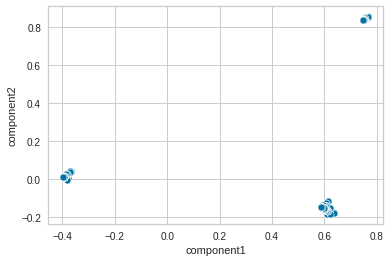

In [23]:
#우연에 일치인지 주성분분석후에 산점도가 너무 옯바르게 군집화됨
sns.scatterplot(x='component1', y='component2', data=X, palette='coolwarm')

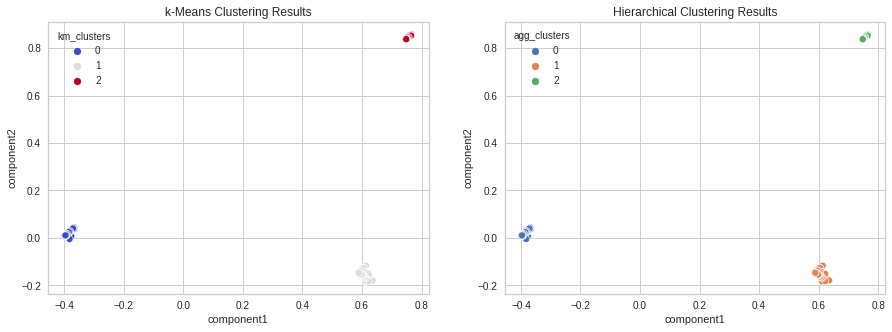

0    4288
1    2397
2     365
Name: km_clusters, dtype: int64
0    4288
1    2397
2     365
Name: agg_clusters, dtype: int64


In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(x='component1', y='component2', data=X_withCluster, hue='km_clusters',
           palette='coolwarm',ax=ax[0])
sns.scatterplot(x='component1', y='component2', data=X_withCluster, hue='agg_clusters',
           palette='deep', ax=ax[1])

ax[0].set(title='k-Means Clustering Results')
ax[1].set(title='Hierarchical Clustering Results')

plt.show()

#다른 알고리즘을 적용했는데, 군집화가 같게 적용되었다
print(X_withCluster['km_clusters'].value_counts())
print(X_withCluster['agg_clusters'].value_counts())

### Silhouette Coefficient값

In [25]:
from sklearn.metrics import silhouette_score

#성능은 Hierarchical Clustering가 더 좋은 것을 확인 할 수 있다.
#k=2를 잡을 때는 둘의 성능이 모두 좋지만
#k>=3이상으로 잡으면 K-means성능은 엄청 떨어진다
print("Silhouette Coefficient:", silhouette_score(X, pred))
print('silhouette of Hierarchical Clustering: %f'%silhouette_score(X,agg_clusters))

Silhouette Coefficient: 0.9953208466757365
silhouette of Hierarchical Clustering: 0.995321


## 채점 기준

- Silhouette Coefficient 점수가 89 이상: 100점(만점)
- Silhouette Coefficient 점수가 85 이상, 89미만: 90점
- Silhouette Coefficient 점수가 80 이상, 85미만: 80점
- Silhouette Coefficient 점수가 80미만: 70점
